Real CSV not found. Creating a synthetic dataset for testing...
Synthetic CSV created at: C:\Users\imriy\Desktop\Final internship project\Climate & Weather Impact on Agriculture\data\raw\climate_agri_data.csv


,temperature,rainfall,humidity,wind_speed,soil_quality,fertilizer_used,yield
0,25,50,60,5,3,1,3000
1,28,40,65,4,4,1,3200
2,22,60,55,6,2,0,2800
3,30,55,70,5,3,1,3500
4,27,45,62,5,3,1,3100


Data cleaning completed.


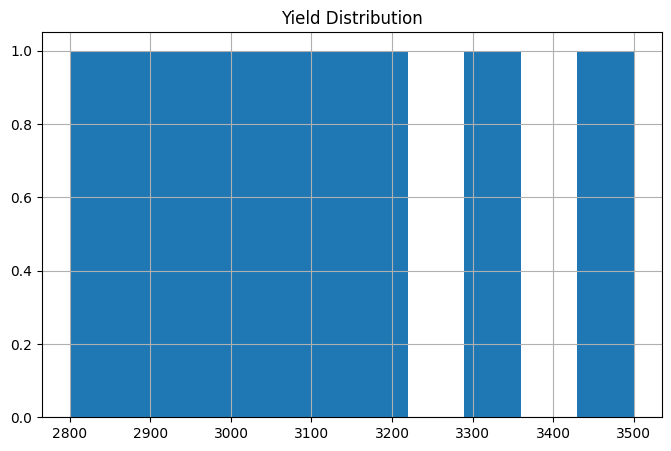

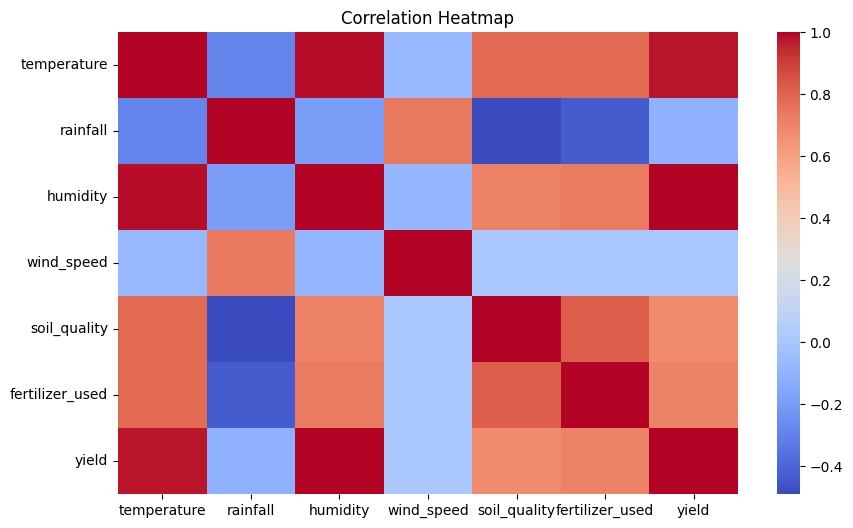

Model training completed!

Model Evaluation:
MAE: 29.625
R2 Score: 0.9312374999999999
Model saved: C:\Users\imriy\Desktop\Final internship project\Climate & Weather Impact on Agriculture\models\yield_model.joblib
All outputs saved inside 'C:\Users\imriy\Desktop\Final internship project\Climate & Weather Impact on Agriculture' folder.


In [5]:
# ============================================================
# CLIMATE & WEATHER IMPACT ON AGRICULTURE 
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load

# -----------------------------
# 1️⃣ Define root folder
# -----------------------------
PROJECT_FOLDER = os.path.join(os.getcwd(), "Climate & Weather Impact on Agriculture")
DATA_FOLDER = os.path.join(PROJECT_FOLDER, "data", "raw")
MODEL_FOLDER = os.path.join(PROJECT_FOLDER, "models")
OUTPUT_FOLDER = os.path.join(PROJECT_FOLDER, "outputs")

os.makedirs(DATA_FOLDER, exist_ok=True)
os.makedirs(MODEL_FOLDER, exist_ok=True)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

DATA_PATH = os.path.join(DATA_FOLDER, "climate_agri_data.csv")

# -----------------------------
# 2️⃣ Load data (or create synthetic CSV if missing)
# -----------------------------
if not os.path.exists(DATA_PATH):
    print("Real CSV not found. Creating a synthetic dataset for testing...")
    data = {
        "temperature": [25, 28, 22, 30, 27, 24, 29, 26],
        "rainfall": [50, 40, 60, 55, 45, 48, 52, 47],
        "humidity": [60, 65, 55, 70, 62, 58, 66, 61],
        "wind_speed": [5, 4, 6, 5, 5, 4, 6, 5],
        "soil_quality": [3, 4, 2, 3, 3, 2, 4, 3],
        "fertilizer_used": [1, 1, 0, 1, 1, 0, 1, 1],
        "yield": [3000, 3200, 2800, 3500, 3100, 2900, 3300, 3050]
    }
    df = pd.DataFrame(data)
    df.to_csv(DATA_PATH, index=False)
    print(f"Synthetic CSV created at: {DATA_PATH}")
else:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset loaded from {DATA_PATH}, shape: {df.shape}")

display(df.head())

# -----------------------------
# 3️⃣ Cleaning & preprocessing
# -----------------------------
df.drop_duplicates(inplace=True)

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
if len(cat_cols) > 0:
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
    df = pd.get_dummies(df, drop_first=True)

print("Data cleaning completed.")

# -----------------------------
# 4️⃣ EDA (Optional)
# -----------------------------
if 'yield' in df.columns:
    plt.figure(figsize=(8,5))
    df['yield'].hist()
    plt.title("Yield Distribution")
    plt.savefig(os.path.join(OUTPUT_FOLDER, "yield_distribution.png"))
    plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig(os.path.join(OUTPUT_FOLDER, "correlation_heatmap.png"))
plt.show()

# -----------------------------
# 5️⃣ Model training
# -----------------------------
X = df.drop("yield", axis=1)
y = df["yield"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
print("Model training completed!")

# -----------------------------
# 6️⃣ Evaluation
# -----------------------------
pred = model.predict(X_test)

print("\nModel Evaluation:")
print("MAE:", mean_absolute_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))

# -----------------------------
# 7️⃣ Save model
# -----------------------------
MODEL_PATH = os.path.join(MODEL_FOLDER, "yield_model.joblib")
dump(model, MODEL_PATH)
print(f"Model saved: {MODEL_PATH}")

# -----------------------------
# 8️⃣ Export outputs for Power BI
# -----------------------------
cleaned_file = os.path.join(OUTPUT_FOLDER, "cleaned_data.csv")
df.to_csv(cleaned_file, index=False)

forecast_df = X_test.copy()
forecast_df["actual_yield"] = y_test
forecast_df["predicted_yield"] = pred
forecast_file = os.path.join(OUTPUT_FOLDER, "yield_predictions.csv")
forecast_df.to_csv(forecast_file, index=False)

feat_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)
feat_file = os.path.join(OUTPUT_FOLDER, "feature_importance.csv")
feat_importance.to_csv(feat_file, index=False)

print(f"All outputs saved inside '{PROJECT_FOLDER}' folder.")
